In [1]:
import numpy as np
import gensim
import PySimpleGUI as sg
import pickle
import os
#from tfidf import tfIDF
#from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler, SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.utils import resample
import pandas as pd

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/dtype

In [2]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV

In [3]:
with open('total_data.pkl','rb') as f:
    total_data = pickle.load(f)

In [4]:
list_x = []
list_y = []
dataset = []
tfidf_object = TfidfVectorizer(use_idf=True, stop_words = 'english')
for key in total_data.keys():
    # fitting paper into tfidf vector
    for paragraph in total_data[key]:
        if paragraph[-1] == 1:
            dataset.append(paragraph[0])
            if paragraph[-2] is False:
                list_y.append(0)
            else:
                list_y.append(1)
                print(paragraph[0])
vectorized_dataset = tfidf_object.fit_transform(dataset)
words = tfidf_object.get_feature_names()
arr = vectorized_dataset.toarray()

Colloidal quantum dots (QDs) are promising candidate materials for photovoltaics (PV) owing to the tunable bandgap and low-cost solution processability. Lead selenide (PbSe) QDs are particularly attractive to PV applications due to the efficient multiple-exciton generation and carrier transportation. However, surface defects arising from the oxidation of the PbSe QDs have been the major limitation for their development in PV. Here, a new passivation method for chlorinated PbSe QDs via ion exchange with cesium lead halide (Br, I) perovskite nanocrystals is reported. The surface chloride ions on the as-synthesized QDs can be partially exchanged with bromide or iodide ions from the perovskite nanocrystals, hence forming a hybrid halide passivation. Consistent with the improved photoluminescence quantum yield, the champion PV device fabricated with these PbSe QDs achieves a PCE of 8.2%, compared to 7.3% of that fabricated with the untreated QDs. This new method also leads to devices with e

In [8]:

#from tfidf import tfIDFlen_train = int(len(list_y) * 0.92)
y_train = np.asarray(list_y)
X, X_test = arr[:len_train], arr[len_train:]
y, Y_test = y_train[:len_train], y_train[len_train:]
print(X.shape)
print(y.shape)

(2792, 15871)
(2792,)


In [9]:
def over_sampler(X,y):
    count = np.sum(y)
    idxx = np.argwhere(y==1)[:,0]
    new_idxx = np.random.choice(idxx, np.sum(y==0)- np.sum(y))
    X_0 = np.concatenate([X, X[new_idxx]],axis=0)
    y_0 = np.concatenate([y, y[new_idxx]])
    return X_0, y_0

In [10]:
X_train, Y_train = over_sampler(X, y)
print(X_train.shape)
print(Y_train.shape)

(4978, 15871)
(4978,)


In [11]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

/home/duc/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.9995983935742973
[[2487    2]
 [   0 2489]]


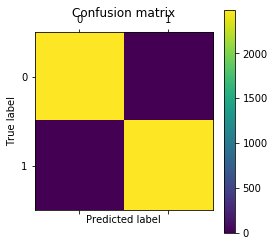

In [12]:
y_pred = model.predict(X_train)
print(f1_score(Y_train, y_pred))
cm = confusion_matrix(Y_train, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

0.5161290322580646
[[220   6]
 [  9   8]]


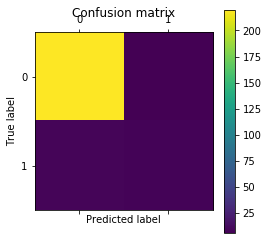

In [13]:
Y_pred = model.predict(X_test)
print(f1_score(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, Y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


In [ ]:
filename = 'test_1_model.sav'
pickle.dump(model, open(filename, 'wb'))